# MOVIE_DATA_ANALYSIS🎥🎬🎞️🍿

## 과제 🔥
### 장르별 영화 트렌드 및 흥행 성공 요인 분석

#### 최근 20년간 영화 장르별 트렌드 변화를 분석하고, 각 장르에서 흥행에 성공한 영화들의 공통 요소(예산, 런타임, 출연진, 개봉 시기 등)를 파악하세요.

### **데이터 정제 및 가공**

In [1]:
import pandas as pd 

# 저장된 CSV 파일 불러오기 
file_path = "tmdb_kr_theatrical_2005_2025.csv" 
try: 
    df = pd.read_csv(file_path, encoding='utf-8-sig') 
    print("파일을 성공적으로 불러왔습니다.") 
except FileNotFoundError: 
    print(f"오류: {file_path} 파일을 찾을 수 없습니다. 먼저 데이터 수집 코드를 실행하여 파일을 생성해주세요.") 
    # 파일이 없는 경우를 대비하여 빈 DataFrame을 생성하고 종료 
    df = pd.DataFrame()  

if not df.empty: 
    # 데이터프레임의 초기 상태 확인 
    print("\n--- 초기 데이터프레임 정보 ---") 
    print(df.info()) 
     
    # 1단계: 결측치 처리 
    # 'runtime', 'budget', 'revenue' 컬럼의 결측값을 0으로 채우기 
    # 이 값들은 0으로 두는 것이 분석에 더 적합할 수 있습니다. 
    df['runtime'] = df['runtime'].fillna(0) 
    df['budget'] = df['budget'].fillna(0) 
    df['revenue'] = df['revenue'].fillna(0) 
     
    # 'genres' 컬럼의 결측값은 '미정'으로 채우기 
    # 장르 정보가 없는 경우 '미정'으로 분류하여 나중에 분석할 수 있도록 합니다. 
    df['genres'] = df['genres'].fillna('미정') 
     
    # 'release_date'가 없는 행은 분석에서 제외하기 위해 삭제합니다. 
    df = df.dropna(subset=['release_date']) 
     
    # 결측치 처리 후 데이터프레임의 상태 확인 
    print("\n--- 결측치 처리 후 데이터프레임 정보 ---") 
    print(df.isnull().sum()) 
     
    # 2단계: 데이터 가공 (장르 확장) 
    # 'genres' 컬럼의 문자열을 리스트로 변환 
    # 장르가 '[]' 형태로 저장되어 있으므로, eval() 함수를 이용해 리스트로 변환합니다. 
    # 안전을 위해 try-except 블록을 사용합니다. 
    df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else ['미정']) 
     
    # 장르 리스트를 개별 행으로 확장 
    # 이 작업이 끝나면 한 영화가 여러 장르에 속할 경우 행이 여러 개로 나뉩니다. 
    df = df.explode('genres') 

    # 가공 후 데이터프레임의 최종 상태 확인 
    print("\n--- 장르 확장 후 최종 데이터프레임 정보 ---") 
    print(df.info()) 
    print(df.head()) 
     
    # 최종 결과를 새로운 CSV 파일로 저장 
    df.to_csv("tmdb_kr_theatrical_2005_2025_processed.csv", index=False, encoding='utf-8-sig') 
    print("\n전처리된 데이터가 'tmdb_kr_theatrical_2005_2025_processed.csv' 파일에 저장되었습니다.")


파일을 성공적으로 불러왔습니다.

--- 초기 데이터프레임 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4670 non-null   int64  
 1   title                 4670 non-null   object 
 2   original_title        4670 non-null   object 
 3   original_language     4670 non-null   object 
 4   release_date          4668 non-null   object 
 5   runtime               4670 non-null   int64  
 6   budget                4670 non-null   int64  
 7   revenue               4670 non-null   int64  
 8   vote_average          4670 non-null   float64
 9   vote_count            4670 non-null   int64  
 10  popularity            4670 non-null   float64
 11  genres                4670 non-null   object 
 12  production_companies  4670 non-null   object 
 13  production_countries  4670 non-null   object 
 14  release_year          4668 non-n

### **전처리 파일 확인**

In [8]:
import pandas as pd
from IPython.display import display

# 최종 전처리된 CSV 파일 불러오기
file_path = "tmdb_kr_theatrical_2005_2025_processed.csv"
try:
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    print("전처리된 파일을 성공적으로 불러왔습니다.")
    
    # 데이터프레임의 상위 5개 행 출력
    print("\n--- 전처리된 데이터프레임의 상위 5개 행 ---")
    display(df.head())
    
    # 데이터프레임의 정보(컬럼, Non-Null Count) 확인
    print("\n--- 전처리된 데이터프레임의 정보 ---")
    print(df.info())

except FileNotFoundError:
    print(f"오류: {file_path} 파일을 찾을 수 없습니다.")


전처리된 파일을 성공적으로 불러왔습니다.

--- 전처리된 데이터프레임의 상위 5개 행 ---


,movie_id,title,original_title,original_language,release_date,runtime,budget,revenue,vote_average,vote_count,popularity,genres,production_companies,production_countries,release_year,release_month
0,670,올드보이,올드보이,ko,2003-11-21,120,3000000,17500000,8.252,9150,11.6819,드라마,"['Show East', 'Egg Film', 'Cineclick Asia']",['KR'],2003.0,11.0
1,670,올드보이,올드보이,ko,2003-11-21,120,3000000,17500000,8.252,9150,11.6819,스릴러,"['Show East', 'Egg Film', 'Cineclick Asia']",['KR'],2003.0,11.0
2,670,올드보이,올드보이,ko,2003-11-21,120,3000000,17500000,8.252,9150,11.6819,미스터리,"['Show East', 'Egg Film', 'Cineclick Asia']",['KR'],2003.0,11.0
3,670,올드보이,올드보이,ko,2003-11-21,120,3000000,17500000,8.252,9150,11.6819,액션,"['Show East', 'Egg Film', 'Cineclick Asia']",['KR'],2003.0,11.0
4,1255,괴물,괴물,ko,2006-07-27,119,11000000,88489643,6.980,2931,4.4383,공포,"['Chungeorahm Film', 'Showbox']",['KR'],2006.0,7.0



--- 전처리된 데이터프레임의 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7651 entries, 0 to 7650
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              7651 non-null   int64  
 1   title                 7651 non-null   object 
 2   original_title        7651 non-null   object 
 3   original_language     7651 non-null   object 
 4   release_date          7651 non-null   object 
 5   runtime               7651 non-null   int64  
 6   budget                7651 non-null   int64  
 7   revenue               7651 non-null   int64  
 8   vote_average          7651 non-null   float64
 9   vote_count            7651 non-null   int64  
 10  popularity            7651 non-null   float64
 11  genres                7104 non-null   object 
 12  production_companies  7651 non-null   object 
 13  production_countries  7651 non-null   object 
 14  release_year          7651 non-null   float64
 

### **장르별 영화 개수 확인**

In [3]:
import pandas as pd

# 전처리된 CSV 파일 불러오기
file_path = "tmdb_kr_theatrical_2005_2025_processed.csv"
try:
    df_movie = pd.read_csv(file_path, encoding='utf-8-sig')
    print("전처리된 파일을 성공적으로 불러왔습니다.")
except FileNotFoundError:
    print(f"오류: {file_path} 파일을 찾을 수 없습니다. 전처리 코드를 먼저 실행하여 파일을 생성해주세요.")
    df_movie = pd.DataFrame()

if not df_movie.empty:
    # 런타임, 예산, 수익이 0인 영화는 제외 (의미있는 데이터만 사용)
    df_movie = df_movie[df_movie['runtime'] > 0]
    df_movie = df_movie[df_movie['budget'] > 0]
    df_movie = df_movie[df_movie['revenue'] > 0]
    
    # 장르별로 그룹화하여 영화 개수 세기
    genre_counts = df_movie.groupby('genres').size().reset_index(name='movie_count')
    
    # 영화 개수를 기준으로 내림차순 정렬
    genre_counts = genre_counts.sort_values(by='movie_count', ascending=False)
    
    print("\n--- 장르별 영화 총 개수 (데이터셋 내) ---")
    display(genre_counts)



전처리된 파일을 성공적으로 불러왔습니다.

--- 장르별 영화 총 개수 (데이터셋 내) ---


,genres,movie_count
5,드라마,52
12,액션,45
10,스릴러,34
16,코미디,25
9,범죄,16
7,모험,14
3,공포,14
0,SF,11
13,역사,11
8,미스터리,11


### **장르별 순수익 기준 상위 5개 영화 목록**

In [5]:
import pandas as pd

# 전처리된 CSV 파일 불러오기
file_path = "tmdb_kr_theatrical_2005_2025_processed.csv"
try:
    df_movie = pd.read_csv(file_path, encoding='utf-8-sig')
    print("전처리된 파일을 성공적으로 불러왔습니다.")
except FileNotFoundError:
    print(f"오류: {file_path} 파일을 찾을 수 없습니다. 전처리 코드를 먼저 실행하여 파일을 생성해주세요.")
    df_movie = pd.DataFrame()

if not df_movie.empty:
    # 런타임, 예산, 수익이 0인 영화는 제외 (의미있는 데이터만 사용)
    df_movie = df_movie[df_movie['runtime'] > 0]
    df_movie = df_movie[df_movie['budget'] > 0]
    df_movie = df_movie[df_movie['revenue'] > 0]
    
    # 순수익(profit) 컬럼 계산 및 추가
    # profit = revenue - budget
    df_movie['profit'] = df_movie['revenue'] - df_movie['budget']

    # 장르별로 그룹화하여 순수익 기준 상위 5개 영화 추출
    # nlargest() 함수를 사용해 각 장르 그룹 내에서 profit이 가장 높은 5개 행을 선택합니다.
    top_movies_per_genre = df_movie.groupby('genres').apply(lambda x: x.nlargest(5, 'profit')).reset_index(drop=True)
    
    # 결과를 출력
    print("\n--- 장르별 순수익 기준 상위 5개 흥행 성공 영화 목록 ---")
    
    # 보기 좋게 장르별로 분리해서 출력합니다.
    for genre in top_movies_per_genre['genres'].unique():
        print(f"\n- 장르: {genre}")
        # 'title'과 'profit' 컬럼만 선택하여 출력합니다.
        genre_movies = top_movies_per_genre[top_movies_per_genre['genres'] == genre]
        print(genre_movies[['title', 'profit']].to_string(index=False))



전처리된 파일을 성공적으로 불러왔습니다.

--- 장르별 순수익 기준 상위 5개 흥행 성공 영화 목록 ---

- 장르: SF
title   profit
   괴물 77489643
 설국열차 47558912
  디 워 43108998
   마녀 18840302
#살아있다  7116285

- 장르: TV 영화
           title  profit
터닝메카드W: 블랙미러의 부활 1775228

- 장르: 가족
     title   profit
넛잡: 땅콩 도둑들 78885527
빼꼼의 머그잔 여행 -5281600
      레드슈즈 -9945644

- 장르: 공포
title   profit
  부산행 79047518
   괴물 77489643
  디 워 43108998
   곡성 38900770
   반도 25698327

- 장르: 다큐멘터리
 title  profit
하와이 연가 -550000

- 장르: 드라마
    title    profit
      기생충 246228776
       명량 128842258
신과함께-죄와 벌 107683972
       괴물  77489643
    택시운전사  69107975

- 장르: 로맨스
     title   profit
       아가씨 30025000
내 깡패 같은 애인  3414668
   라스트 갓파더  3300000
슈퍼맨이었던 사나이  -401966
        만추 -1380000

- 장르: 모험
     title    profit
 신과함께-죄와 벌 107683972
 신과함께-인과 연  94490210
    범죄도시 2  93566707
       부산행  79047518
넛잡: 땅콩 도둑들  78885527

- 장르: 미스터리
       title   profit
          곡성 38900770
        숨바꼭질 33561505
          마녀 18840302
시크릿 인 데어 아이즈 15354990
        올드보이 14500000



C:\Users\sec\AppData\Local\Temp\ipykernel_62088\2822344150.py:24: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_movies_per_genre = df_movie.groupby('genres').apply(lambda x: x.nlargest(5, 'profit')).reset_index(drop=True)


### **장르별 순수익 기준 상위 5개 흥행 성공 영화 목록과 상세 정보**

- '기생충'처럼 여러 장르에 걸쳐 있는 영화들은 말씀하신 대로 여러 장르 분석 결과에 동시에 포함될 수 있음.

- 데이터 전처리 단계에서 explode() 함수를 사용한 이유: 한 영화가 여러 장르를 가지고 있을 때, 그 영화의 데이터를 장르별로 분리해서 각각의 장르 트렌드와 흥행 요인에 기여하도록 함.

- '기생충'이 드라마, 스릴러, 코미디 장르에서 모두 상위권에 올랐다는 사실 : 
    - 성공 요인 분석의 심화: '기생충'은 한 가지 장르에만 치우치지 않고, 여러 장르의 재미 요소를 성공적으로 결합했기 때문에 더 넓은 관객층에게 어필할 수 있었다고 해석 가능.
    - 복합 장르의 중요성: 이는 최근 영화 시장에서 **복합 장르(Hybrid Genre)**가 흥행에 큰 영향을 미친다는 통찰을 제공. 단순히 하나의 장르만 잘 만드는 것이 아니라, 여러 장르의 매력을 섞는 것이 성공의 비결일 수 있음.

- 오히려 "이 영화는 여러 장르에서 모두 통할 만큼 대단한 작품이구나" !

In [6]:
import pandas as pd
from IPython.display import display

# 전처리된 CSV 파일 불러오기
file_path = "tmdb_kr_theatrical_2005_2025_processed.csv"
try:
    df_movie = pd.read_csv(file_path, encoding='utf-8-sig')
    print("전처리된 파일을 성공적으로 불러왔습니다.")
except FileNotFoundError:
    print(f"오류: {file_path} 파일을 찾을 수 없습니다. 'show-full-processed-df' 코드를 먼저 실행하여 파일을 생성해주세요.")
    df_movie = pd.DataFrame()

if not df_movie.empty:
    # 런타임, 예산, 수익이 0인 영화는 제외 (의미있는 데이터만 사용)
    df_movie = df_movie[df_movie['runtime'] > 0]
    df_movie = df_movie[df_movie['budget'] > 0]
    df_movie = df_movie[df_movie['revenue'] > 0]
    
    # 순수익(profit) 컬럼 계산 및 추가
    df_movie['profit'] = df_movie['revenue'] - df_movie['budget']

    # 장르별로 그룹화하여 순수익 기준 상위 5개 영화 추출
    top_movies_per_genre = df_movie.groupby('genres').apply(lambda x: x.nlargest(5, 'profit')).reset_index(drop=True)
    
    print("\n--- 장르별 순수익 기준 상위 5개 흥행 성공 영화 목록과 상세 정보 ---")
    
    # 보기 좋게 장르별로 분리해서 출력합니다.
    for genre in top_movies_per_genre['genres'].unique():
        print(f"\n- 장르: {genre}")
        # 장르에 해당하는 영화들만 필터링
        genre_movies = top_movies_per_genre[top_movies_per_genre['genres'] == genre]
        
        # 'title', 'profit', 'budget', 'runtime', 'release_date' 컬럼만 선택하여 출력합니다.
        # 'profit', 'budget' 컬럼은 더 보기 좋게 포맷합니다.
        genre_movies_display = genre_movies[['title', 'profit', 'budget', 'runtime', 'release_date']].copy()
        
        # 숫자 컬럼을 천 단위 구분 기호와 '원'을 추가하여 포맷
        genre_movies_display['profit'] = genre_movies_display['profit'].apply(lambda x: f"{x:,.0f}원")
        genre_movies_display['budget'] = genre_movies_display['budget'].apply(lambda x: f"{x:,.0f}원")
        
        # display() 함수를 사용하여 표 형태로 출력
        display(genre_movies_display)



전처리된 파일을 성공적으로 불러왔습니다.

--- 장르별 순수익 기준 상위 5개 흥행 성공 영화 목록과 상세 정보 ---

- 장르: SF


C:\Users\sec\AppData\Local\Temp\ipykernel_62088\1542930516.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_movies_per_genre = df_movie.groupby('genres').apply(lambda x: x.nlargest(5, 'profit')).reset_index(drop=True)


,title,profit,budget,runtime,release_date
0,괴물,"77,489,643원","11,000,000원",119,2006-07-27
1,설국열차,"47,558,912원","39,200,000원",127,2013-08-01
2,디 워,"43,108,998원","32,000,000원",92,2007-08-01
3,마녀,"18,840,302원","5,500,000원",125,2018-06-27
4,#살아있다,"7,116,285원","6,300,000원",98,2020-06-24



- 장르: TV 영화


,title,profit,budget,runtime,release_date
5,터닝메카드W: 블랙미러의 부활,"1,775,228원","1,000,000원",72,2017-01-18



- 장르: 가족


,title,profit,budget,runtime,release_date
6,넛잡: 땅콩 도둑들,"78,885,527원","42,000,000원",86,2014-01-17
7,빼꼼의 머그잔 여행,"-5,281,600원","5,900,000원",76,2007-03-22
8,레드슈즈,"-9,945,644원","20,000,000원",92,2019-07-25



- 장르: 공포


,title,profit,budget,runtime,release_date
9,부산행,"79,047,518원","8,500,000원",118,2016-07-20
10,괴물,"77,489,643원","11,000,000원",119,2006-07-27
11,디 워,"43,108,998원","32,000,000원",92,2007-08-01
12,곡성,"38,900,770원","10,951,000원",156,2016-05-12
13,반도,"25,698,327원","17,000,000원",115,2020-07-15



- 장르: 다큐멘터리


,title,profit,budget,runtime,release_date
14,하와이 연가,"-550,000원","800,000원",62,2024-10-30



- 장르: 드라마


,title,profit,budget,runtime,release_date
15,기생충,"246,228,776원","11,363,000원",131,2019-05-30
16,명량,"128,842,258원","9,500,000원",128,2014-07-30
17,신과함께-죄와 벌,"107,683,972원","18,300,000원",139,2017-12-20
18,괴물,"77,489,643원","11,000,000원",119,2006-07-27
19,택시운전사,"69,107,975원","12,820,005원",137,2017-08-02



- 장르: 로맨스


,title,profit,budget,runtime,release_date
20,아가씨,"30,025,000원","8,575,000원",144,2016-06-01
21,내 깡패 같은 애인,"3,414,668원","800,000원",105,2010-05-20
22,라스트 갓파더,"3,300,000원","13,400,000원",103,2010-12-29
23,슈퍼맨이었던 사나이,"-401,966원","4,250,000원",102,2008-01-31
24,만추,"-1,380,000원","6,200,000원",113,2011-02-17



- 장르: 모험


,title,profit,budget,runtime,release_date
25,신과함께-죄와 벌,"107,683,972원","18,300,000원",139,2017-12-20
26,신과함께-인과 연,"94,490,210원","18,300,000원",141,2018-08-01
27,범죄도시 2,"93,566,707원","7,600,000원",106,2022-05-18
28,부산행,"79,047,518원","8,500,000원",118,2016-07-20
29,넛잡: 땅콩 도둑들,"78,885,527원","42,000,000원",86,2014-01-17



- 장르: 미스터리


,title,profit,budget,runtime,release_date
30,곡성,"38,900,770원","10,951,000원",156,2016-05-12
31,숨바꼭질,"33,561,505원","1,900,000원",107,2013-08-14
32,마녀,"18,840,302원","5,500,000원",125,2018-06-27
33,시크릿 인 데어 아이즈,"15,354,990원","19,500,000원",111,2015-10-14
34,올드보이,"14,500,000원","3,000,000원",120,2003-11-21



- 장르: 범죄


,title,profit,budget,runtime,release_date
35,극한직업,"116,532,206원","8,120,000원",111,2019-01-23
36,범죄도시 2,"93,566,707원","7,600,000원",106,2022-05-18
37,베테랑,"80,441,770원","7,528,230원",123,2015-08-05
38,범죄도시,"47,046,454원","5,900,000원",121,2017-10-03
39,아저씨,"41,804,790원","1,255,000원",119,2010-08-04



- 장르: 스릴러


,title,profit,budget,runtime,release_date
40,기생충,"246,228,776원","11,363,000원",131,2019-05-30
41,신과함께-죄와 벌,"107,683,972원","18,300,000원",139,2017-12-20
42,신과함께-인과 연,"94,490,210원","18,300,000원",141,2018-08-01
43,범죄도시 2,"93,566,707원","7,600,000원",106,2022-05-18
44,베테랑,"80,441,770원","7,528,230원",123,2015-08-05



- 장르: 애니메이션


,title,profit,budget,runtime,release_date
45,넛잡: 땅콩 도둑들,"78,885,527원","42,000,000원",86,2014-01-17
46,터닝메카드W: 블랙미러의 부활,"1,775,228원","1,000,000원",72,2017-01-18
47,돼지의 왕,"-129,987원","130,000원",96,2011-11-03
48,하와이 연가,"-550,000원","800,000원",62,2024-10-30
49,빼꼼의 머그잔 여행,"-5,281,600원","5,900,000원",76,2007-03-22



- 장르: 액션


,title,profit,budget,runtime,release_date
50,명량,"128,842,258원","9,500,000원",128,2014-07-30
51,극한직업,"116,532,206원","8,120,000원",111,2019-01-23
52,신과함께-죄와 벌,"107,683,972원","18,300,000원",139,2017-12-20
53,신과함께-인과 연,"94,490,210원","18,300,000원",141,2018-08-01
54,범죄도시 2,"93,566,707원","7,600,000원",106,2022-05-18



- 장르: 역사


,title,profit,budget,runtime,release_date
55,명량,"128,842,258원","9,500,000원",128,2014-07-30
56,택시운전사,"69,107,975원","12,820,005원",137,2017-08-02
57,최종병기 활,"41,000,000원","8,000,000원",122,2011-08-10
58,1987,"37,072,115원","12,308,000원",129,2017-12-27
59,인천상륙작전,"36,496,532원","12,700,000원",110,2016-07-27



- 장르: 음악


,title,profit,budget,runtime,release_date
60,하와이 연가,"-550,000원","800,000원",62,2024-10-30



- 장르: 전쟁


,title,profit,budget,runtime,release_date
61,명량,"128,842,258원","9,500,000원",128,2014-07-30
62,인천상륙작전,"36,496,532원","12,700,000원",110,2016-07-27
63,안시성,"28,204,280원","13,305,000원",135,2018-09-19
64,웰컴 투 동막골,"25,579,813원","8,000,000원",133,2005-08-04
65,군함도,"25,183,383원","21,000,000원",132,2017-07-26



- 장르: 코미디


,title,profit,budget,runtime,release_date
66,기생충,"246,228,776원","11,363,000원",131,2019-05-30
67,극한직업,"116,532,206원","8,120,000원",111,2019-01-23
68,베테랑,"80,441,770원","7,528,230원",123,2015-08-05
69,넛잡: 땅콩 도둑들,"78,885,527원","42,000,000원",86,2014-01-17
70,엑시트,"58,609,772원","10,892,000원",103,2019-07-31



- 장르: 판타지


,title,profit,budget,runtime,release_date
71,신과함께-죄와 벌,"107,683,972원","18,300,000원",139,2017-12-20
72,신과함께-인과 연,"94,490,210원","18,300,000원",141,2018-08-01
73,해적: 바다로 간 산적,"51,400,000원","13,000,000원",129,2014-08-06
74,디 워,"43,108,998원","32,000,000원",92,2007-08-01
75,헨젤과 그레텔,"-1,793,375원","4,000,000원",116,2007-12-27


### **시각화**

전처리된 파일을 성공적으로 불러왔습니다.

--- 연도별 영화 제작 트렌드 시각화 ---


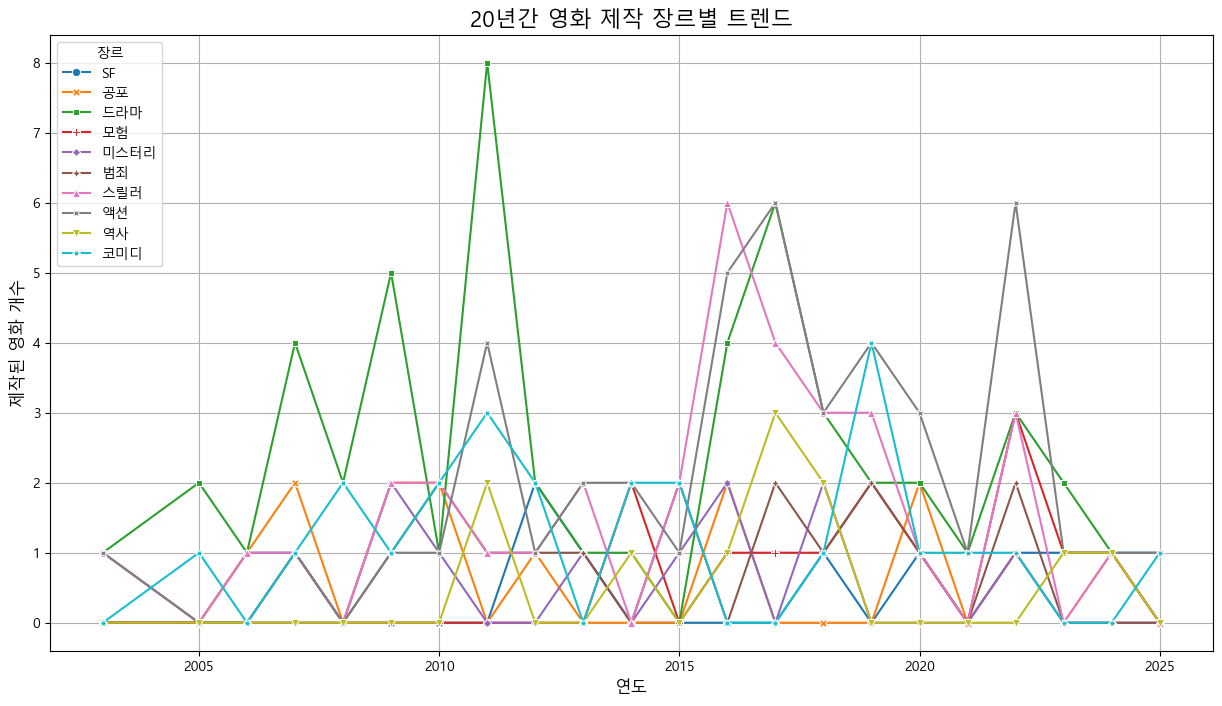


--- 장르별 평균 흥행 지표 시각화 ---

--- 평균 순수익 기준 상위 10개 장르의 상세 지표 ---


,genres,average_profit,average_budget,average_runtime,movie_count
10,스릴러,3.684750e+07,9.636340e+06,121.558824,34
7,모험,3.636090e+07,1.765338e+07,115.928571,14
12,액션,3.318595e+07,1.286929e+07,121.155556,45
9,범죄,3.235738e+07,7.229949e+06,113.062500,16
13,역사,3.033856e+07,1.572118e+07,125.545455,11
17,판타지,2.881169e+07,1.823860e+07,121.888889,9
15,전쟁,2.733605e+07,1.671167e+07,131.111111,9
16,코미디,2.708940e+07,9.960424e+06,105.600000,25
5,드라마,2.385396e+07,9.820949e+06,120.307692,52
3,공포,1.923849e+07,9.037571e+06,108.714286,14


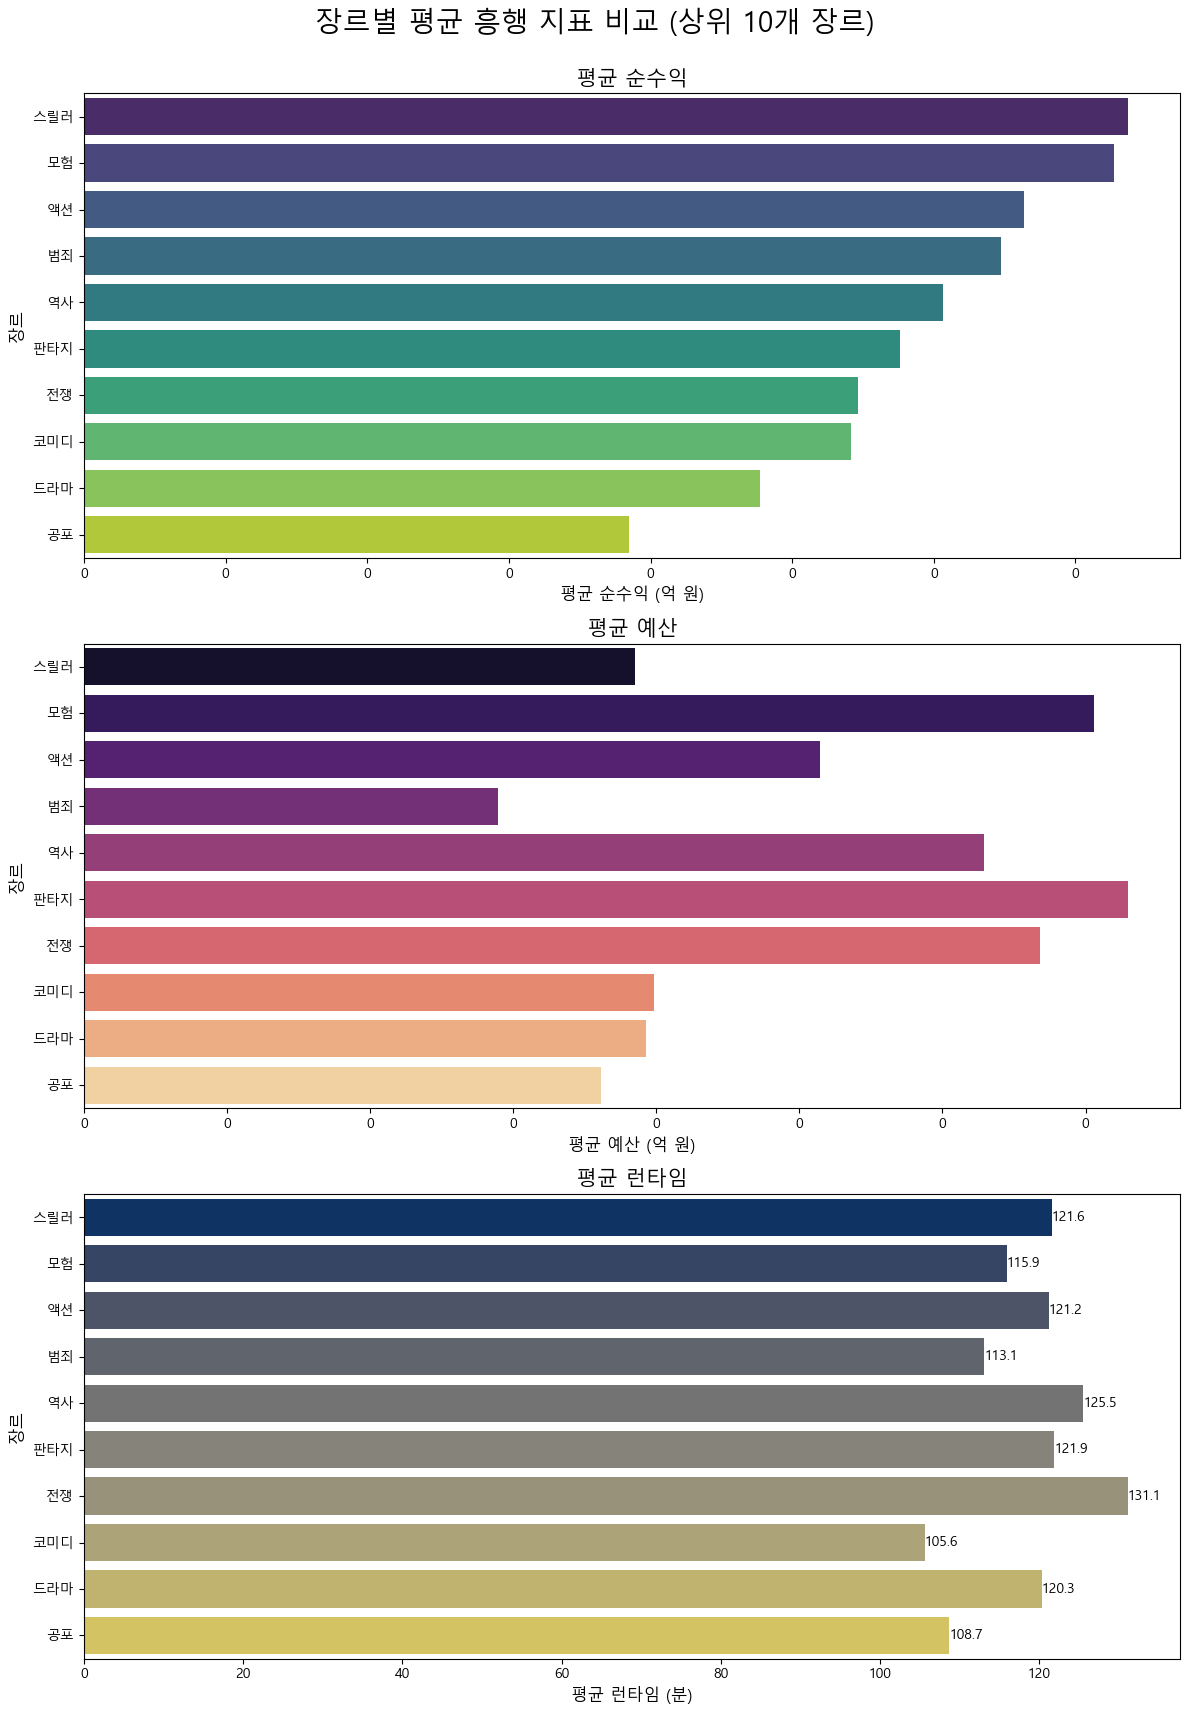


--- 개봉 시기(계절)별 평균 순수익 시각화 ---

--- 계절별 평균 순수익 ---


,season,profit
0,봄,2.864392e+07
1,여름,2.952076e+07
2,가을,1.318078e+07
3,겨울,2.690245e+07


C:\Users\sec\AppData\Local\Temp\ipykernel_62088\1775693466.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='profit', data=seasonal_profit, palette='Paired')


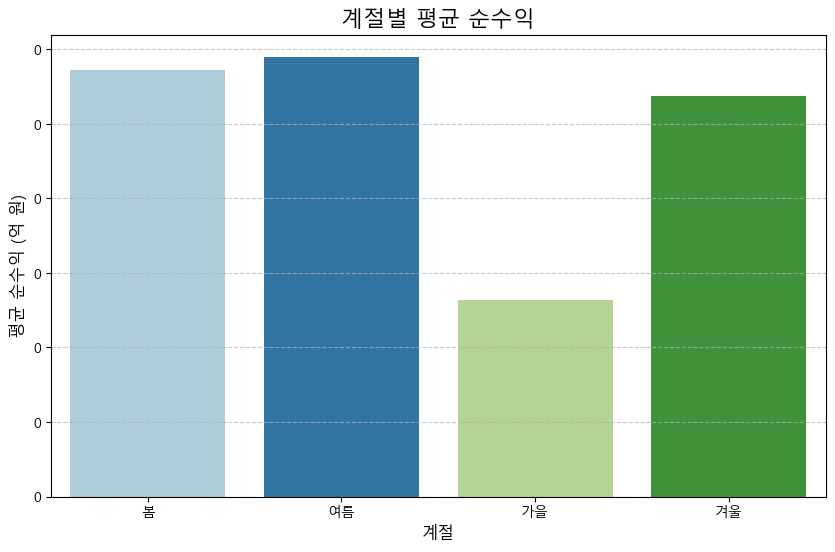


--- 장르별 흥행 영화의 개봉 계절 분포 시각화 ---


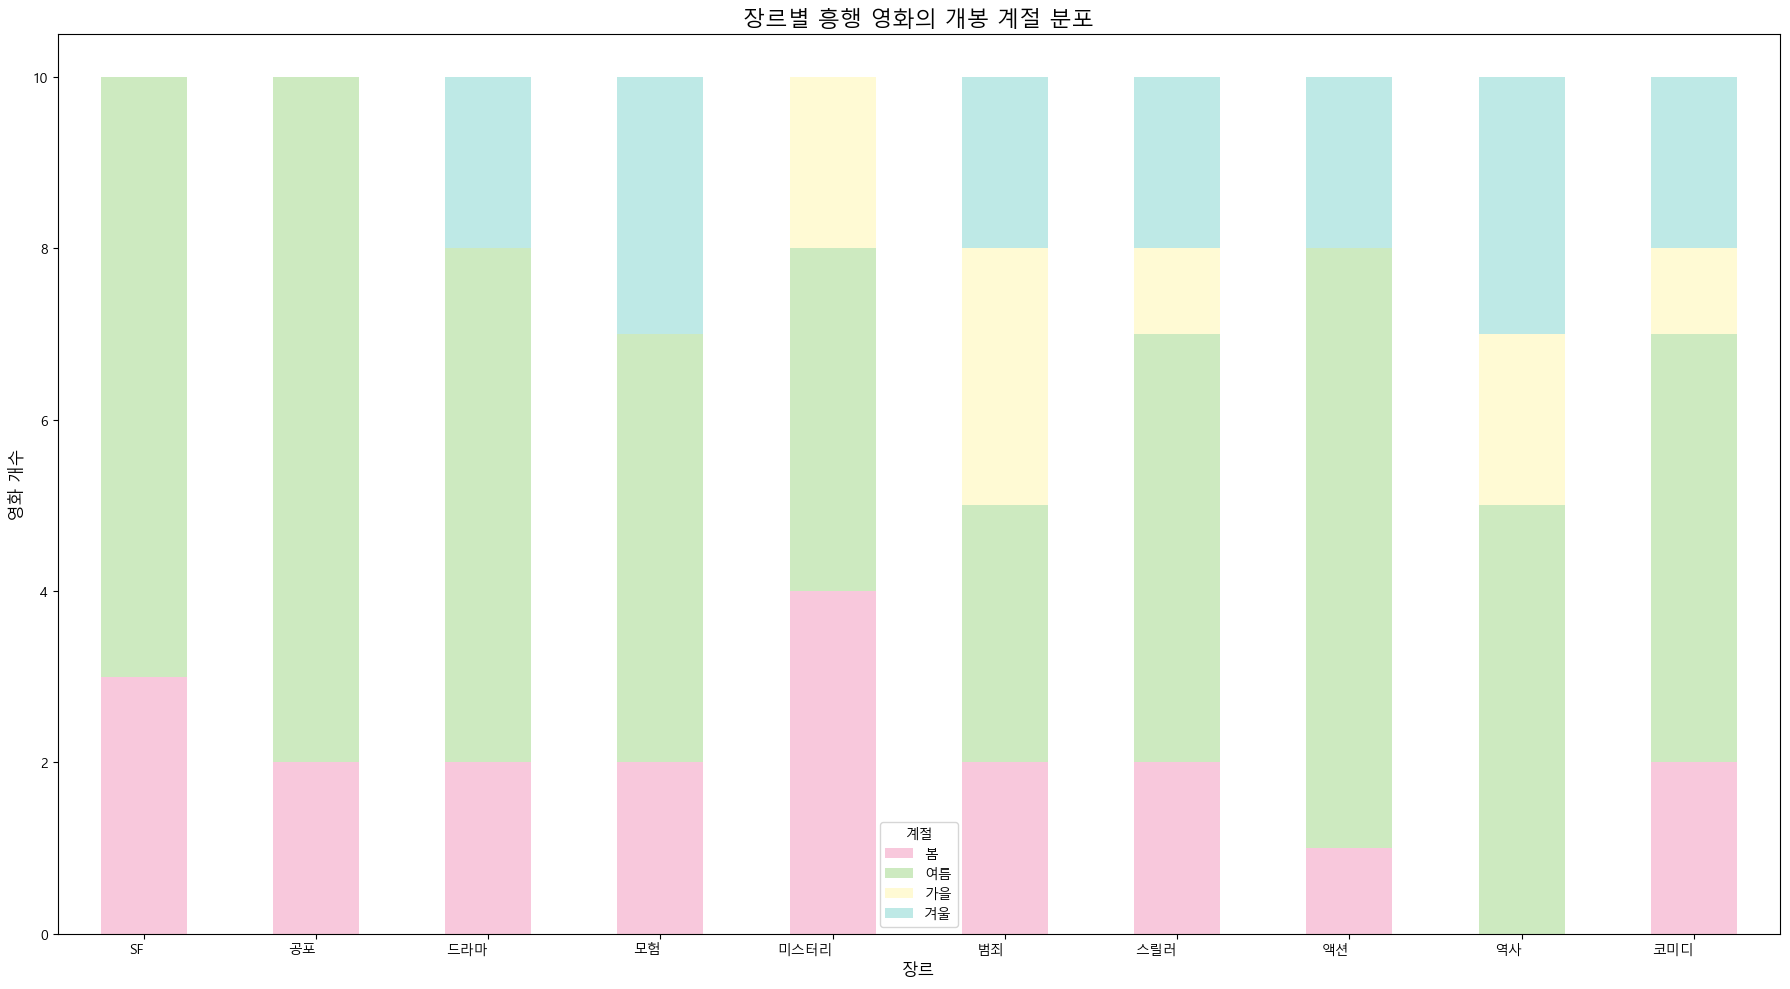

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore', category=UserWarning)
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# Matplotlib의 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 전처리된 CSV 파일 불러오기
file_path = "tmdb_kr_theatrical_2005_2025_processed.csv"
try:
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    print("전처리된 파일을 성공적으로 불러왔습니다.")
except FileNotFoundError:
    print(f"오류: {file_path} 파일을 찾을 수 없습니다. 'show-full-processed-df' 코드를 먼저 실행하여 파일을 생성해주세요.")
    df = pd.DataFrame()

if not df.empty:
    # 런타임, 예산, 수익이 0인 영화는 분석에서 제외합니다.
    df = df[(df['runtime'] > 0) & (df['budget'] > 0) & (df['revenue'] > 0)]
    
    # 'profit' (순수익) 컬럼 계산
    df['profit'] = df['revenue'] - df['budget']
    
    # 'release_date'를 datetime 객체로 변환하고 'year' 컬럼 생성
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['year'] = df['release_date'].dt.year

    # 월을 계절로 매핑하는 함수
    def get_season(month):
        if month in [3, 4, 5]:
            return '봄'
        elif month in [6, 7, 8]:
            return '여름'
        elif month in [9, 10, 11]:
            return '가을'
        else:
            return '겨울'
    
    # 'release_date'의 월을 기반으로 'season' 컬럼 생성
    df['season'] = df['release_date'].dt.month.apply(get_season)

    # ======================================================
    # 1. 연도별 장르 트렌드 시각화 (선 그래프)
    # ======================================================
    print("\n--- 연도별 영화 제작 트렌드 시각화 ---")
    
    # 각 장르별 영화 개수 계산
    genre_counts = df['genres'].value_counts()
    # 영화 수가 많은 상위 10개 장르만 선택
    top_10_genres = genre_counts.head(10).index
    
    # 상위 10개 장르 데이터만 필터링
    df_top_genres = df[df['genres'].isin(top_10_genres)]
    
    # 연도와 장르별로 영화 개수 집계
    genre_trends = df_top_genres.groupby(['year', 'genres']).size().unstack(fill_value=0)
    
    plt.figure(figsize=(15, 8))
    sns.lineplot(data=genre_trends, markers=True, dashes=False)
    plt.title('20년간 영화 제작 장르별 트렌드', fontsize=16)
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('제작된 영화 개수', fontsize=12)
    plt.legend(title='장르', loc='upper left')
    plt.grid(True)
    plt.show()

    # ======================================================
    # 2. 장르별 흥행 요인 시각화 (막대 그래프)
    # ======================================================
    print("\n--- 장르별 평균 흥행 지표 시각화 ---")

    # 장르별로 그룹화하여 평균 순수익, 예산, 런타임 계산
    success_factors = df.groupby('genres').agg(
        average_profit=('profit', 'mean'),
        average_budget=('budget', 'mean'),
        average_runtime=('runtime', 'mean'),
        movie_count=('title', 'count')
    ).reset_index()

    # 영화 수가 5개 이상인 장르만 선택하여 분석 신뢰도 높이기
    success_factors = success_factors[success_factors['movie_count'] >= 5]
    # 평균 순수익 기준으로 상위 10개 장르 선택
    top_10_by_profit = success_factors.sort_values(by='average_profit', ascending=False).head(10)
    
    print("\n--- 평균 순수익 기준 상위 10개 장르의 상세 지표 ---")
    display(top_10_by_profit)

    fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=False)
    fig.suptitle('장르별 평균 흥행 지표 비교 (상위 10개 장르)', fontsize=20, y=0.95)

    # 순수익 막대 그래프
    sns.barplot(x='average_profit', y='genres', data=top_10_by_profit, ax=axes[0], palette='viridis', hue='genres', legend=False)
    axes[0].set_title('평균 순수익', fontsize=15)
    axes[0].set_xlabel('평균 순수익 (억 원)', fontsize=12)
    axes[0].set_ylabel('장르', fontsize=12)
    axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/100000000:,.0f}'))
    
    # 예산 막대 그래프
    sns.barplot(x='average_budget', y='genres', data=top_10_by_profit, ax=axes[1], palette='magma', hue='genres', legend=False)
    axes[1].set_title('평균 예산', fontsize=15)
    axes[1].set_xlabel('평균 예산 (억 원)', fontsize=12)
    axes[1].set_ylabel('장르', fontsize=12)
    axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/100000000:,.0f}'))

    # 런타임 막대 그래프
    sns.barplot(x='average_runtime', y='genres', data=top_10_by_profit, ax=axes[2], palette='cividis', hue='genres', legend=False)
    axes[2].set_title('평균 런타임', fontsize=15)
    axes[2].set_xlabel('평균 런타임 (분)', fontsize=12)
    axes[2].set_ylabel('장르', fontsize=12)
    
    # 런타임 값 표시
    for container in axes[2].containers:
        axes[2].bar_label(container, fmt='%.1f')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    # ======================================================
    # 3. 개봉 시기(계절)별 흥행 요인 시각화 (막대 그래프)
    # ======================================================
    print("\n--- 개봉 시기(계절)별 평균 순수익 시각화 ---")

    # 계절별로 그룹화하여 평균 순수익 계산
    seasonal_profit = df.groupby('season')['profit'].mean().reindex(['봄', '여름', '가을', '겨울']).reset_index()
    
    print("\n--- 계절별 평균 순수익 ---")
    display(seasonal_profit)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='season', y='profit', data=seasonal_profit, palette='Paired')
    plt.title('계절별 평균 순수익', fontsize=16)
    plt.xlabel('계절', fontsize=12)
    plt.ylabel('평균 순수익 (억 원)', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/100000000:,.0f}'))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # ======================================================
    # 4. 장르별 흥행 영화의 개봉 계절 분포 시각화
    # ======================================================
    print("\n--- 장르별 흥행 영화의 개봉 계절 분포 시각화 ---")
    
    # 영화 수가 5개 이상인 장르만 선택하여 분석 신뢰도 높이기
    genre_counts_filtered = df['genres'].value_counts()
    valid_genres = genre_counts_filtered[genre_counts_filtered >= 5].index
    df_filtered_genres = df[df['genres'].isin(valid_genres)]

    # 각 장르별로 순수익 상위 10개 영화만 추출
    top_movies_per_genre = df_filtered_genres.sort_values(by='profit', ascending=False).groupby('genres').head(10).reset_index(drop=True)
    
    # 흥행 영화가 존재하는 상위 10개 장르만 선택
    top_10_genres_with_movies = top_movies_per_genre['genres'].value_counts().nlargest(10).index
    final_df = top_movies_per_genre[top_movies_per_genre['genres'].isin(top_10_genres_with_movies)]

    # 각 장르 내에서 계절별 영화 개수 집계
    genre_season_counts = final_df.groupby(['genres', 'season']).size().unstack(fill_value=0)
    
    # 계절 순서 재정렬
    genre_season_counts = genre_season_counts[['봄', '여름', '가을', '겨울']]
    
    # 계절에 맞는 색상 팔레트 정의 (파스텔 톤)
    seasonal_colors = ['#F8C8DC', '#CDEAC0', '#FFFAD4', '#BEE9E6'] # 봄, 여름, 가을, 겨울
    
    # 데이터가 비어있지 않은지 확인
    if not genre_season_counts.empty:
        genre_season_counts.plot(kind='bar', figsize=(18, 10), stacked=True, color=seasonal_colors)
        plt.title('장르별 흥행 영화의 개봉 계절 분포', fontsize=16)
        plt.xlabel('장르', fontsize=12)
        plt.ylabel('영화 개수', fontsize=12)
        plt.xticks(rotation=0, ha='right', fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(title='계절', fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print("데이터가 부족하여 그래프를 생성할 수 없습니다.")
